In [9]:
from perceptron import Perceptron
from data_generator import NormalGenerator
from typing import List, Tuple

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
def train_loop(N_range: np.ndarray, alpha_range: np.ndarray,
			   nd: int = 200, nmax: int = 100) -> List[float]:

	results = list()

	for N in N_range:
		
		print(f"Doing {N = }")
		
		generator = NormalGenerator(N)
		success_runs = np.zeros(len(alpha_range))

		for i, alpha in enumerate(alpha_range):
			P = int(alpha * N)

			success_sum = 0
			for _ in range(nd):
				perceptron = Perceptron(N)
				X, Y = generator.generate(P)
				if perceptron.train(X, Y, nmax):
					success_sum += 1

			success_runs[i] = float(success_sum) / float(nd)
		
		results.append(success_runs)

	return results

In [19]:
alpha_range1 = np.arange(0.75, 3.01, 0.25)
N_range1 = np.array([20, 40, 100])

results1 = train_loop(N_range1, alpha_range1)

Doing N = 20


KeyboardInterrupt: 

In [21]:
alpha_range2 = np.arange(1.0, 2.51, 0.10)
N_range2 = np.array([5, 20, 50, 100])

results2 = train_loop(N_range2, alpha_range2, nd=500)

Doing N = 5
Doing N = 20
Doing N = 50
Doing N = 100


In [10]:
def plot_results(alpha_range: np.ndarray, N_range: np.ndarray,
                 results: List[float]) -> Tuple[mpl.figure.Figure, mpl.axes.Axes]:

    fig, plots = plt.subplots(1, len(results), figsize=(len(results) * 4, 3))
    for i, plot in enumerate(plots):
        plot.plot(alpha_range, results[i])
        plot.set_title(f"N = {N_range[i]}")

    return fig, plots

In [17]:
mpl.use("pgf")
mpl.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

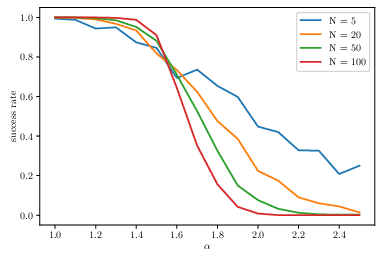

In [25]:
plt.close()

# fig, plots = plot_results(alpha_range1, N_range1, results1)
for i in range(len(N_range2)):
    plt.plot(alpha_range2, results2[i], label=f"N = {N_range2[i]}")

plt.legend()
plt.xlabel("$\\alpha$")
plt.ylabel("success rate")

plt.savefig("pictures/N_testing_5_100.pgf")

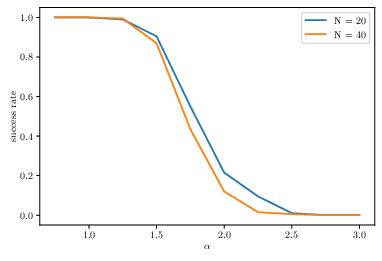

In [18]:
plt.close()

# fig, plots = plot_results(alpha_range1, N_range1, results1)
for i, plot in enumerate(plots):
    plt.plot(alpha_range1, results1[i], label=f"N = {N_range1[i]}")

plt.legend()
plt.xlabel("$\\alpha$")
plt.ylabel("success rate")

plt.savefig("pictures/N_testing_20_40_100.pgf")

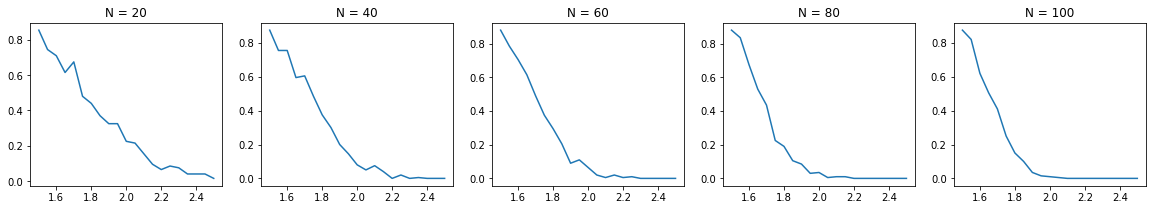

In [ ]:
plot_results(alpha_range2, N_range2, results2)